## Nygaard TMD

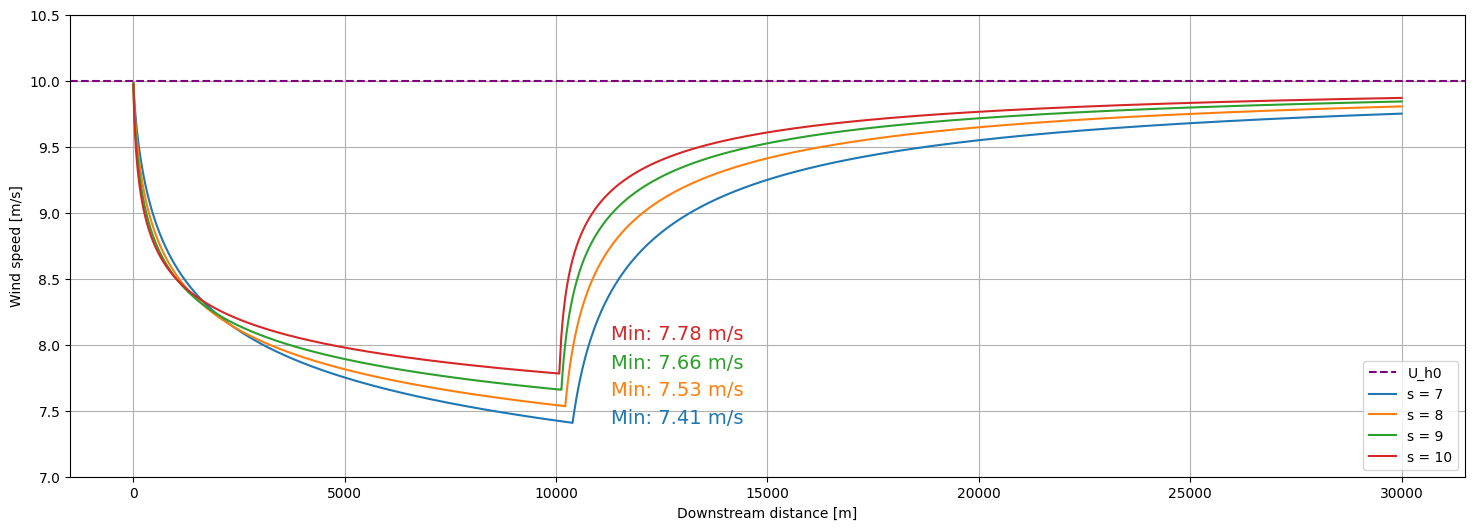

In [55]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq, nsolve, log

def calculate_wind_speed(x1, x2, x3, z_h, D, C_T, s_x, s_y, U_h0):

    k = 0.4 # Von Karman constant [-]
    z_0lo = 0.0001 # surface rughness length [m]

    ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
    #print("ct: ", ct)
    nu_star = 28 * np.sqrt(ct)
    #print("nu_star: ", nu_star)
    beta =  nu_star / (1 + nu_star)
    #print("beta: ", beta)
    z0_WF = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
    #print("z0_WF: ", z0_WF)

    x1 = x1
    x2 = x2
    x3 = x3
    x = np.linspace(x1, x3, x3)

    h1 = np.full_like(x, np.nan, dtype=float)
    h2 = np.full_like(x, np.nan, dtype=float)

    h1[x > x1] = z_h + ((x[x > x1]) / z0_WF)**(4/5)
    h2[x > x2] = ((x[x>x2]-x2)/z0_WF)**(4/5)

    uw = np.full_like(x, np.nan, dtype=float)

    idx1 = h1 >= z_h
    uw[idx1] = U_h0 * (np.log(h1[idx1] / z_0lo) * np.log(z_h / z0_WF)) / (np.log(h1[idx1] / z0_WF) * np.log(z_h/z_0lo))

    idx2 = (x > x2) & (h2 >= z_h)
    uw[idx2] = U_h0 * (np.log(h1[idx2] / z_0lo) * np.log(h2[idx2] / z0_WF)) / (np.log(h1[idx2] / z0_WF) * np.log(h2[idx2] / z_0lo))

    return x, uw, U_h0

# calculate_wind_speed(x1, x2, x3, z_h, D, ct, s_x, s_y, U_G, C_star):
x_s7, uw_s7, U_h0_s7 = calculate_wind_speed(0, 10000, 30001, 100, 100, 0.8, 7, 7, 10.0)
x_s8, uw_s8, U_h0_s8 = calculate_wind_speed(0, 10000, 30001, 100, 100, 0.8, 8, 8, 10.0)
x_s9, uw_s9, U_h0_s9 = calculate_wind_speed(0, 10000, 30001, 100, 100, 0.8, 9, 9, 10.0)
x_s10, uw_s10, U_h0_s10 = calculate_wind_speed(0, 10000, 30001, 100, 100, 0.8, 10, 10, 10.0)

plt.figure(figsize=(18, 6))
plt.axhline(y=10.0, color='purple', linestyle='--', label='U_h0')
plt.plot(x_s7, uw_s7, label='s = 7', color='#1f77b4')
plt.plot(x_s8, uw_s8, label='s = 8', color='#ff7f0e')
plt.plot(x_s9, uw_s9, label='s = 9', color='#2ca02c')
plt.plot(x_s10, uw_s10, label='s = 10', color='#d62728')

# Add text boxes for minimum wind velocities
min_s7 = np.nanmin(uw_s7)
min_s8 = np.nanmin(uw_s8)
min_s9 = np.nanmin(uw_s9)
min_s10 = np.nanmin(uw_s10)

plt.text(11300, min_s7, f"Min: {min_s7:.2f} m/s", color='#1f77b4', fontsize=14)
plt.text(11300, min_s8 + 0.08, f"Min: {min_s8:.2f} m/s", color='#ff7f0e', fontsize=14)
plt.text(11300, min_s9 + 0.16, f"Min: {min_s9:.2f} m/s", color='#2ca02c', fontsize=14)
plt.text(11300, min_s10 + 0.26, f"Min: {min_s10:.2f} m/s", color='#d62728', fontsize=14)

plt.xlabel('Downstream distance [m]')
plt.ylabel('Wind speed [m/s]')
plt.ylim(7.0, 10.5)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [47]:
from sympy import symbols, limit, oo, ln

x1 = 0
x2 = 10000
x3 = 30000

z_h = 100
D = 100
s_x = 10
s_y = 10
C_T = 0.8
U_G = 11.87
C_star = 4.5

f = 1*10**(-4) # Coriolis parameter [1/s]
k = 0.4 # Von Karman constant [-]
z_0lo = 0.0001 # surface rughness length [m]

ct = (np.pi * C_T * D**2)/(8 * s_x*D * s_y*D)
print("ct: ", ct)
nu_star = 28 * np.sqrt(ct)
print("nu_star: ", nu_star)
beta =  nu_star / (1 + nu_star)
print("beta: ", beta)
z_0hi = z_h * (1 + D/(2 * z_h))**beta * np.exp(-(ct/(2 * k**2) + (np.log(z_h / z_0lo * (1 - D/(2 * z_h))**beta))**-2)**-0.5)
print("z_0hi: ", z_0hi)
u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
print("u_star_lo: ", u_star_lo)
u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)
print("u_star_hi: ", u_star_hi)
U_h0 = u_star_lo / k * np.log(z_h / z_0lo)
print("U_h0: ", U_h0)
z0_WF = z_h * (1 + D/(2 * z_h))**beta * np.exp(-k * (ct + (k/np.log((z_h / z_0lo) * (1 - D/(2 * z_h))**beta))**2)**-0.5)
print("z0_WF: ", z0_WF)

from sympy import symbols, limit, oo, ln, sqrt, pi

x = symbols('x')

h1 = z_h + (x / z0_WF)**(4/5)
h2 = ((x - x2)/z0_WF)**(4/5)

# Use SymPy's ln(), not np.log()
uw_deficit = U_h0 * (ln(h1 / z_0lo) * ln(z_h / z0_WF)) / (ln(h1 / z0_WF) * ln(z_h/z_0lo))
uw_recovery = U_h0 * (ln(h1 / z_0lo) * ln(h2 / z0_WF)) / (ln(h1 / z0_WF) * ln(h2 / z_0lo))

# Take the limit as x → ∞
lim_inf = limit(uw_deficit, x, 0)
print("Limit as x → 0:", round(lim_inf,0))

# Take the limit as x → ∞
lim_inf = limit(uw_deficit, x, oo)
print("Limit as x → ∞:", round(lim_inf,0))

ct:  0.003141592653589793
nu_star:  1.56939754059142
beta:  0.6108037062377581
z_0hi:  0.040470497524118396
u_star_lo:  0.28960587639689944
u_star_hi:  0.45691028954745894
U_h0:  10.002632607524651
z0_WF:  0.23568827613865057
Limit as x → 0: 10.0000000000000
Limit as x → ∞: 4.00000000000000


## Model comparison to pywake


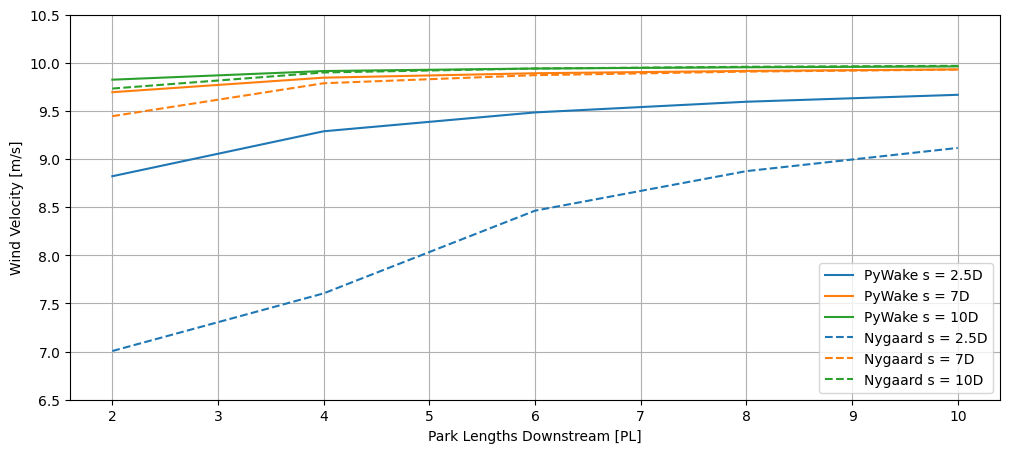

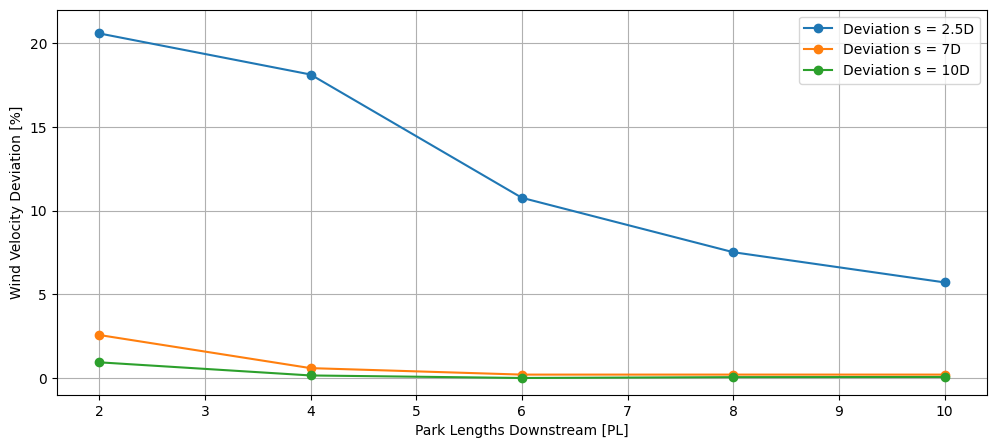

In [48]:
park_lengths = [2, 4, 6, 8, 10]  # Park lengths in PL

# Wind velocities from Pywake Propagate Downstream
velocities_2_5D = [8.822, 9.289, 9.485, 9.596, 9.668]
velocities_7D   = [9.695, 9.846, 9.892, 9.916, 9.932]
velocities_10D  = [9.825, 9.915, 9.941, 9.954, 9.963]

# Wind velocities from Nygaard IBL Recovery
nygaard_2_5D = [7.006, 7.605, 8.464, 8.875, 9.116]
nygaard_7D   = [9.446, 9.788, 9.872, 9.909, 9.930]
nygaard_10D  = [9.733, 9.900, 9.941, 9.959, 9.969]

# Deviations [%] between PyWake and Nygaard for each spacing
deviation_2_5D = [20.585, 18.129, 10.764, 7.514, 5.710]
deviation_7D   = [2.568, 0.589, 0.202, 0.202, 0.202]
deviation_10D  = [0.936, 0.151, 0.000, 0.050, 0.060]

# Plot wind velocities as a function of park lengths
plt.figure(figsize=(12, 5))
plt.plot(park_lengths, velocities_2_5D, label='PyWake s = 2.5D', color='#1f77b4')
plt.plot(park_lengths, velocities_7D, label='PyWake s = 7D', color='#ff7f0e')
plt.plot(park_lengths, velocities_10D, label='PyWake s = 10D', color='#2ca02c')
plt.plot(park_lengths, nygaard_2_5D, label='Nygaard s = 2.5D', linestyle='--', color='#1f77b4')
plt.plot(park_lengths, nygaard_7D, label='Nygaard s = 7D', linestyle='--', color='#ff7f0e')
plt.plot(park_lengths, nygaard_10D, label='Nygaard s = 10D', linestyle='--', color='#2ca02c')
#plt.title('Wind velocity at various park lengths')
plt.xlabel('Park Lengths Downstream [PL]')
plt.ylabel('Wind Velocity [m/s]')
plt.ylim(6.5, 10.5)
plt.legend()
plt.grid(True)
plt.show()

# Plot deviations as a function of park lengths
plt.figure(figsize=(12, 5))
plt.plot(park_lengths, deviation_2_5D, label='Deviation s = 2.5D', marker='o')
plt.plot(park_lengths, deviation_7D, label='Deviation s = 7D', marker='o')
plt.plot(park_lengths, deviation_10D, label='Deviation s = 10D', marker='o')
#plt.title('Wind velocity deviations at various park lengths')
plt.xlabel('Park Lengths Downstream [PL]')
plt.ylabel('Wind Velocity Deviation [%]')
plt.ylim(-1.0, 22)
plt.legend()
plt.grid(True)
plt.show()

$ w_{width} = ((n-1) \cdot D \cdot s_y \cdot 1.08) + (0.04 + 0.01 \cdot s_y) \cdot x $
## Fit til efter alle wake er mixet
## Lav faktorer baseret på wake og ikke waket area?

[16124. 17004. 17884. 18764. 19644. 20524. 21404. 22284. 23164.]


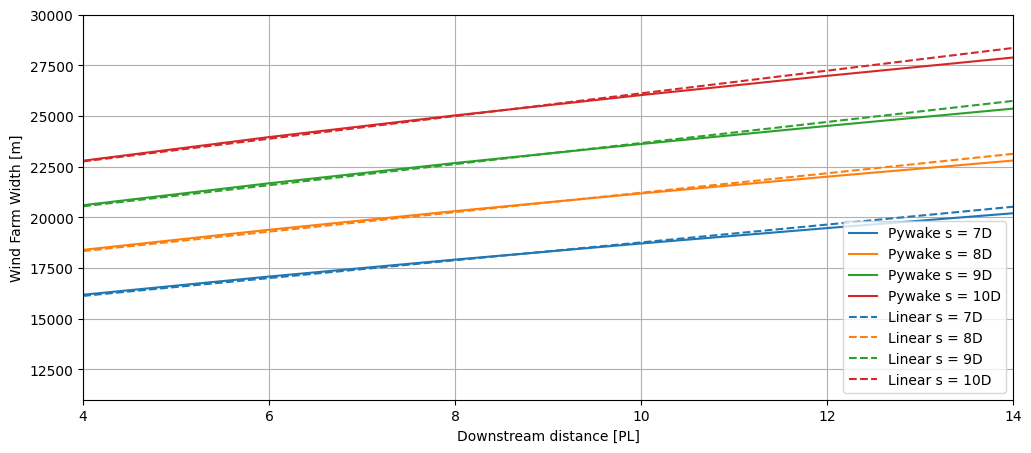

In [49]:
# Park width calculation
s_x =10
n = 20
lf = 4 * D*s_x
D = 100  # rotor diameter
x = np.linspace(4 * lf, 20 * lf, 9)

s7_ww = [16182, 17080, 17916, 18710, 19470, 20202, 20910, 21596, 22266] 
s8_ww = [18396, 19388, 20310, 21180, 22008, 22804, 23572, 24316, 25038] 
s9_ww = [20600, 21682, 22682, 23620, 24512, 25366, 26188, 26980, 27099]
s10_ww = [22796, 23962, 25032, 26034, 26984, 27888, 28756, 28999, 28999]

s_x7 = 7
k7 = 0.04 + 0.01 * s_x7
wf7 = (n-1) * D*s_x7 * 1.08

s_x8 = 8
k8 = 0.04 + 0.01*s_x8
wf8 = (n-1) * D*s_x8 * 1.08

s_x9 = 9
k9 = 0.04 + 0.01*s_x9
wf9 = (n-1) * D*s_x9 * 1.08

s_x10 = 10
k10 = 0.04 + 0.01*s_x10
wf10 = (n-1) * D*s_x10 * 1.08

ww_s7 = wf7 + k7 * x
ww_s8 = wf8 + k8 * x
ww_s9 = wf9 + k9 * x
ww_s10 = wf10 + k10 * x

print(ww_s7)

plt.figure(figsize=(12, 5))
plt.plot(x/lf, s7_ww, label='Pywake s = 7D', color='#1f77b4')
plt.plot(x/lf, s8_ww, label='Pywake s = 8D', color='#ff7f0e')
plt.plot(x/lf, s9_ww, label='Pywake s = 9D', color='#2ca02c')
plt.plot(x/lf, s10_ww, label='Pywake s = 10D', color='#d62728')
plt.plot(x/lf, ww_s7, label='Linear s = 7D', linestyle='--', color='#1f77b4')
plt.plot(x/lf, ww_s8, label='Linear s = 8D', linestyle='--', color='#ff7f0e')
plt.plot(x/lf, ww_s9, label='Linear s = 9D', linestyle='--', color='#2ca02c')
plt.plot(x/lf, ww_s10, label='Linear s = 10D', linestyle='--', color='#d62728')
plt.xlabel('Downstream distance [PL]')
plt.ylabel('Wind Farm Width [m]')
#plt.title('Wind Farm Width vs Downstream Distance')
plt.xlim(4, 14)
plt.ylim(11000, 30000)
plt.legend()
plt.grid(True)
plt.show()